In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt 

In [16]:
vocab_size = 10000  
maxlen = 500       
batch_size = 32
embedding_dim = 32
rnn_units = 32

In [17]:
(x_train,y_train),(x_test, y_test) = imdb.load_data(num_words = vocab_size)

In [19]:
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [20]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(rnn_units),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.5940 - loss: 0.6528 - val_accuracy: 0.8008 - val_loss: 0.4584
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8257 - loss: 0.3970 - val_accuracy: 0.6334 - val_loss: 0.6344
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7272 - loss: 0.5488 - val_accuracy: 0.7354 - val_loss: 0.5264
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8306 - loss: 0.3885 - val_accuracy: 0.7176 - val_loss: 0.5615
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8427 - loss: 0.3666 - val_accuracy: 0.8032 - val_loss: 0.4840
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8999 - loss: 0.2598 - val_accuracy: 0.6814 - val_loss: 0.6974
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8956 - loss: 0.2591 - val_accuracy: 0.7592 - val_loss: 0.6059
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9526 - loss: 0.1359 - 

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7709 - loss: 0.8085

Test accuracy: 0.7746


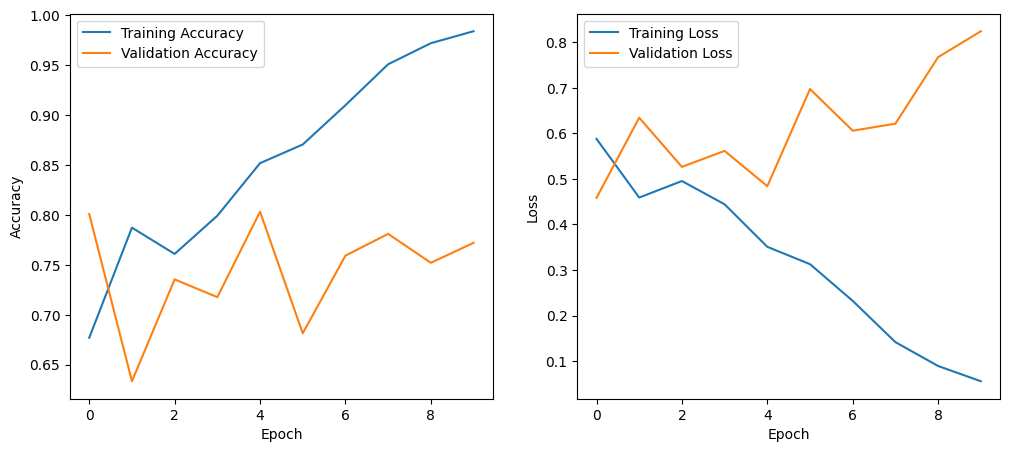

In [28]:
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)

In [25]:
# Prediction function
def predict_sentiment(text_sample):
    # Word to index mapping
    word_index = imdb.get_word_index()
    
    # Preprocess the text
    words = text_sample.lower().split()
    sequence = [word_index[word] if word in word_index and word_index[word] < vocab_size else 0 for word in words]
    sequence = sequence[-maxlen:]  # Truncate if longer than maxlen
    sequence = pad_sequences([sequence], maxlen=maxlen)
    
    # Make prediction
    prediction = model.predict(sequence)[0][0]
    sentiment = "positive" if prediction > 0.5 else "negative"
    confidence = prediction if sentiment == "positive" else 1 - prediction
    
    print(f'Text: "{text_sample}"')
    print(f'Sentiment: {sentiment} (confidence: {confidence:.2%})')


In [26]:
# Example predictions
predict_sentiment("This movie was absolutely wonderful! The acting was superb.")
predict_sentiment("I hated this film. It was boring and poorly made.")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Text: "This movie was absolutely wonderful! The acting was superb."
Sentiment: positive (confidence: 69.38%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Text: "I hated this film. It was boring and poorly made."
Sentiment: negative (confidence: 72.99%)
